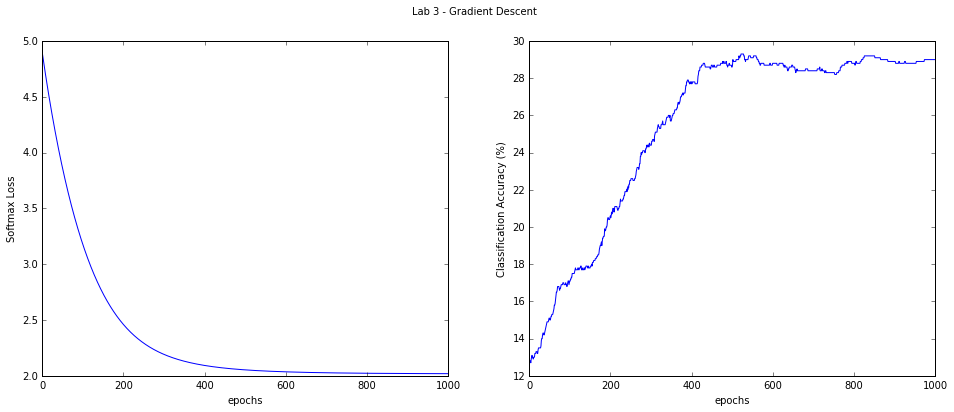

In [5]:
%matplotlib inline
import numpy as np
import pdb
import matplotlib.pyplot as plt


class lab3():

    def __init__(self, features, labels, num_class):

        self.feat = features # # of features by # of samples
        self.num_samples = float(len(features[0,:]))
        self.num_feat = len(features[:,0])
        self.labs = labels # 1 by number of samples
        self.num_c = num_class
        self.one_hot = np.zeros(features.shape)
        self.L = float()


        for i in range(0,len(self.labs[0])):
            self.one_hot[self.labs[0][i]][i] = 1.0

        self.W = np.random.randn(self.num_c,self.num_feat)
        # self.W = np.zeros((self.num_c,self.num_feat))
        self.grad = np.zeros(self.W.shape)

    def loss_function(self):
        # softmax loss function

        self.S = np.dot(self.W,self.feat)
        b = np.max(self.S,0)
        L_mat = -np.log(np.divide(np.exp(np.subtract(self.S,b)),np.sum(np.exp(np.subtract(self.S,b)),0)))
        # print np.sum(np.sum(np.divide(np.exp(np.subtract(self.S,b)),np.sum(np.exp(np.subtract(self.S,b)),0)),0))
        L_mat = self.one_hot*L_mat
        L_mat = np.sum(L_mat,0)
        self.L = np.sum(L_mat)/self.num_samples
        return self.L


    def numerical_gradient(self):
        self.loss_function()
        e = 1e-6
        for i in range(self.num_c):
            for j in range(self.num_feat):
                # print self.W, '\n'
                self.W[i,j] = self.W[i,j]+e
                # print self.W, '\n'
                L_e = self.loss_function()
                self.W[i,j] = self.W[i,j]-e
                # print self.W, '\n'
                # raw_input()
                L = self.loss_function()
                self.grad[i,j] = (L_e-L)/e

    def calc_accuracy(self):
        self.z = np.argmax(self.S,0)
        # print self.z
        accuracy = np.sum(self.z==self.labs[0,:])/self.num_samples
        return accuracy

    def minimize_loss(self):

        step_size = 0.1
        num_epochs = 1000
        self.loss_array = np.zeros(num_epochs)
        self.accuracy = np.zeros(num_epochs)
        for i in range(num_epochs):

            self.loss_array[i] = self.loss_function()
            self.numerical_gradient()
            self.W = self.W - step_size * self.grad
            self.accuracy[i] = self.calc_accuracy()*100.0


if __name__ == '__main__':

        # =============================================
        #
        # load cifar-10-small and project down
        #

    def unpickle( file ):
        import cPickle
        fo = open(file, 'rb')
        dict = cPickle.load(fo)
        fo.close()
        return dict


    data = unpickle('/home/nmd89/Dropbox/Graduate Folders/CS 501R - Deep Learning/Lab2/cifar-10-batches-py/data_batch_1')

    features = data['data']
    labels = data['labels']
    labels = np.atleast_2d(labels).T

    N = 1000 # items
    D = 10 # labels
    num_class = 10

        # only keep N items
    features = features[ 0:N, : ]
    labels = labels[ 0:N, : ]

    # project down into a D-dimensional space
    features = np.dot( features, np.random.randn( 3072, D) )

    # whiten our data - zero mean and unit standard deviation
    features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

    loss = lab3(features.T, labels.T, num_class)

    loss.minimize_loss()
    
    
    
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    plt.plot(loss.loss_array)
    plt.xlabel('epochs')
    plt.ylabel('Softmax Loss')

    plt.subplot(122)
    plt.plot(loss.accuracy)
    plt.xlabel('epochs')
    plt.ylabel('Classification Accuracy (%)')
    plt.suptitle('Lab 3 - Gradient Descent')
    plt.show()

    

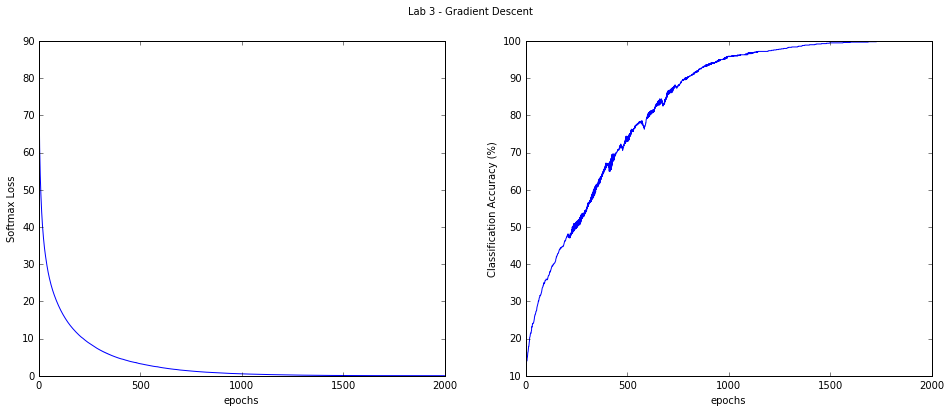

In [6]:
%matplotlib inline
import autograd.numpy as np
from autograd import grad
import pdb
import matplotlib.pyplot as plt


class lab3():

    def __init__(self, features, labels, num_class):

        self.feat = features # # of features by # of samples
        self.num_samples = float(len(features[0,:]))
        self.num_feat = len(features[:,0])
        self.labs = labels # 1 by number of samples
        self.num_c = num_class
        self.one_hot = np.zeros((self.num_c,int(self.num_samples)))
        self.L = float()


        for i in range(0,len(self.labs[0])):
            self.one_hot[self.labs[0][i]][i] = 1.0

        self.W = np.random.randn(self.num_c,self.num_feat)
        # self.W = np.zeros((self.num_c,self.num_feat))
        self.grad = np.zeros(self.W.shape)

    def loss_function(self, W):
        # softmax loss function

        self.S = np.dot(W,self.feat)
        b = np.max(self.S,0)
        L_mat = -np.log(np.divide(np.exp(np.subtract(self.S,b)),np.sum(np.exp(np.subtract(self.S,b)),0)))
        # print np.sum(np.sum(np.divide(np.exp(np.subtract(self.S,b)),np.sum(np.exp(np.subtract(self.S,b)),0)),0))
        L_mat = self.one_hot*L_mat
        L_mat = np.sum(L_mat,0)
        self.L = np.sum(L_mat)/self.num_samples
        return self.L


    # def automatic_gradient(self):
    #     self.loss_function()
    #     e = 1e-6
    #     for i in range(self.num_c):
    #         for j in range(self.num_feat):
    #             # print self.W, '\n'
    #             self.W[i,j] = self.W[i,j]+e
    #             # print self.W, '\n'
    #             L_e = self.loss_function()
    #             self.W[i,j] = self.W[i,j]-e
    #             # print self.W, '\n'
    #             # raw_input()
    #             L = self.loss_function()
    #             self.grad[i,j] = (L_e-L)/e

    def calc_accuracy(self):
        self.z = np.argmax(self.S,0)
        # print self.z
        accuracy = np.sum(self.z==self.labs[0,:])/self.num_samples
        return accuracy

    def minimize_loss(self):

        step_size = 0.1
        num_epochs = 2000
        self.loss_array = np.zeros(num_epochs)
        self.accuracy = np.zeros(num_epochs)
        for i in range(num_epochs):

            self.loss_array[i] = self.loss_function(self.W)
            self.grad = grad(self.loss_function)
            self.W = self.W - step_size * self.grad(self.W)
            self.accuracy[i] = self.calc_accuracy()*100.0


if __name__ == '__main__':

        # =============================================
        #
        # load cifar-10-small and project down
        #

    def unpickle( file ):
        import cPickle
        fo = open(file, 'rb')
        dict = cPickle.load(fo)
        fo.close()
        return dict


    data = unpickle('/home/nmd89/Dropbox/Graduate Folders/CS 501R - Deep Learning/Lab2/cifar-10-batches-py/data_batch_1')

    features = data['data']
    labels = data['labels']
    labels = np.atleast_2d(labels).T

    N = 1000 # items
    # D = 10 # labels
    num_class = 10

    # only keep N items
    features = features[ 0:N, : ]
    labels = labels[ 0:N, : ]

    # # project down into a D-dimensional space
    # features = np.dot( features, np.random.randn( 3072, D) )
    #
    # whiten our data - zero mean and unit standard deviation
    features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

    loss = lab3(features.T, labels.T, num_class)

    loss.minimize_loss()

    plt.figure(figsize=(16,6))
    plt.subplot(121)
    plt.plot(loss.loss_array)
    plt.xlabel('epochs')
    plt.ylabel('Softmax Loss')

    plt.subplot(122)
    plt.plot(loss.accuracy)
    plt.xlabel('epochs')
    plt.ylabel('Classification Accuracy (%)')
    plt.suptitle('Lab 3 - Gradient Descent')
    plt.show()
